<h1>YELP REVIEWS AND RESTAURANTS ANALYSIS</h1>



In [1]:
import math
import numpy as np
import pandas as pd
import datetime
from nltk import word_tokenize
from nltk import sent_tokenize
from collections import Counter



<h4> Pulling the data from the josn files of Yelp academic data challenge<h4>
<li> Business josn file contains information about the variuos businesses </li>
<li> Review json file contains information about the reviews of these businesses </li>

In [2]:
import json
import datetime
datafile='business.json'
business_id = []
restaurant_name=[]
address=[]
city=[]
state=[]
star_rating=[]
review_count=[]
is_open=[]
attr = []
category=[]
lat=[]
long=[]
with open(datafile,'r') as f:
    for line in f:
        data = json.loads(line)
        if ('Restaurants' in data.get('categories')):
            business_id.append(data.get('business_id'))
            restaurant_name.append(data.get('name'))
            address.append(data.get('address'))
            city.append(data.get('city'))
            state.append(data.get('state'))
            star_rating.append(data.get('stars'))
            review_count.append(data.get('review_count'))
            is_open.append(data.get('is_open'))
            attr.append(data.get('attributes'))
            category.append(data.get('categories'))
            lat.append(data.get('latitude'))
            long.append(data.get('longitude'))

In [3]:
business=pd.DataFrame.from_items([('business_id',business_id),('lat',lat),('long',long),('business_name',restaurant_name),('address',address),('city',city),('state',state),('categories',category),('star_rating',star_rating),('is_open',is_open),('attr',attr)])


In [4]:
business

,business_id,lat,long,business_name,address,city,state,categories,star_rating,is_open,attr
0,mLwM-h2YhXl2NCgdS84_Bw,35.236870,-80.741976,South Florida Style Chicken & Ribs,2824 Milton Rd,Charlotte,NC,"[Food, Soul Food, Convenience Stores, Restaura...",4.5,0,"{'GoodForMeal': {'dessert': False, 'latenight'..."
1,duHFBe87uNSXImQmvBh87Q,33.505928,-112.038847,Blimpie,4719 N 20Th St,Phoenix,AZ,"[Sandwiches, Restaurants]",4.5,0,"{'RestaurantsTableService': False, 'GoodForMea..."
2,SDMRxmcKPNt1AHPBKqO64Q,35.135196,-80.714683,Applebee's,9616 E Independence Blvd,Matthews,NC,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",2.0,1,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL..."
3,iFEiMJoEqyB9O8OUNSdLzA,35.355085,-81.087268,China Garden,190 E Dallas Rd,Stanley,NC,"[Chinese, Restaurants]",3.0,1,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no..."
4,HmI9nhgOkrXlUr6KZGZZew,40.461350,-79.948113,Rocky's,4759 Liberty Ave,Pittsburgh,PA,"[Sandwiches, Restaurants, Italian, Diners, Bre...",3.0,1,"{'RestaurantsTableService': True, 'GoodForMeal..."
5,qnpvw-uQyRn9nlClWFK9aA,43.639236,-79.716199,Wild Wing,7070 Saint Barbara Boulevard,Mississauga,ON,"[Chicken Wings, Restaurants]",2.5,1,"{'HasTV': True, 'RestaurantsGoodForGroups': Tr..."
6,TXiEgINSZ75d3EtvLvkc4Q,43.128034,-89.307157,Red Lobster,4502 East Towne Blvd,Madison,WI,"[Restaurants, Seafood, American (Traditional)]",3.0,1,"{'RestaurantsTableService': True, 'GoodForMeal..."
7,KW4y7uDGjVfU3ClkEjIGhg,43.834351,-79.090135,The Works,1794 Liverpool Road,Pickering,ON,"[Burgers, Restaurants]",3.0,1,"{'RestaurantsTableService': True, 'GoodForMeal..."
8,reWc1g65PNZnKz_Ub9QKOQ,43.841993,-79.429343,Milestones Restaurants,30 High Tech Rd,Richmond Hill,ON,"[Comfort Food, Canadian (New), Restaurants, Ba...",2.5,1,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL..."
9,L1XHTn7S-6har9UGAPjcWQ,43.843475,-79.387686,Papa Chang's Tea Bistro,"280 W Beaver Creek Road, Unit 30",Richmond Hill,ON,"[Taiwanese, Food, Coffee & Tea, Restaurants]",4.0,1,"{'GoodForMeal': {'dessert': False, 'latenight'..."


In [5]:
business=business[business["is_open"]==1]  #Filter out the closed restaurants

In [6]:
del business['is_open']

<h4> Categorizing Restaurants into 10 major cuisines</h4>

In [7]:
# Finding the Cuisine of the Restaurants
def rest_category(inp):
    for var in inp:
        if('Mexican' in var):
            return 'Mexican'
        elif('Italian' in var):
            return 'Italian'
        elif('Japanese' in var):
            return 'Japanese'
        elif('Thai' in var):
            return 'Thai'
        elif('Indian' in var):
            return 'Indian'
        elif('Greek' in var):
            return 'Greek'
        elif('French' in var):
            return 'French'
        elif('Spanish' in var):
            return 'Spanish'
        elif('Mediterranean' in var):
            return 'Mediterranean'
        else:
            return 'Other'
        

<h4>Choosing only Restaurants in the Yelp data </h4>

In [8]:
temp_data=business
#Getting list of different business id
bus_id_list = []
bus_id = set(temp_data.business_id)
bus_id = list(bus_id)
#For each business, checking if attributes have restaurant in them and making a list
#of businesses that have restaurant in their attributes
for bus in bus_id:
    bus_data = temp_data.loc[temp_data.business_id == bus]
    attr_list = list(bus_data.attr)[0]
    keys = list(attr_list.keys())
    attr_keys = '-'.join(keys)
    if('Restaurant' in attr_keys):
        bus_id_list.append(bus)
    elif('restaurant' in attr_keys):
        bus_id_list.append(bus)

#Defining a column to check if business is restaurant
temp_data['is_rest'] = 0

#If business is restaurant set this column to 1
temp_data.loc[temp_data['business_id'].isin(bus_id_list),'is_rest'] = 1


#Create new dataframe with data of only restaurants
rest_data = temp_data.loc[temp_data['is_rest'] == 1]
#Resetting index of the new dataframe
rest_data = rest_data.reset_index(drop = True)


/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/divasverma/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
rest_data['cuisine']=rest_data.apply(lambda x: rest_category(x['categories']),axis=1)

In [10]:
rest_data_map = rest_data[['business_name','cuisine','lat','long','city','state']]

rest_data_map.to_csv('restaurant.csv') #to crete a map of which cuisine is present in which region


In [11]:
rating_data=rest_data.groupby( [ "state", "city"] )['star_rating'].mean()
rating_data.to_csv('region_rating.csv')

In [12]:
datafile='review.json'
review_id = []
user_id=[]
business_id=[]
stars=[]
date=[]
text=[]
count=0
with open(datafile,'r') as f:
    for line in f:
        if(count>=100000):
            break
        count+=1
        data = json.loads(line)
        review_id.append(data.get('review_id'))
        user_id.append(data.get('user_id'))
        business_id.append(data.get('business_id'))
        stars.append(data.get('stars'))
        date.append(data.get('date'))
        text.append(data.get('text'))
        

        

In [13]:
rating_data=rest_data.groupby( [ "state", "city"] )['star_rating'].mean()
rating_data.to_csv('region_rating.csv')

In [14]:
review=pd.DataFrame.from_items([('review_id',review_id),('user_id',user_id),('business_id',business_id),('stars',stars),('date',date),('text',text)])


In [15]:
review.head()

,review_id,user_id,business_id,stars,date,text
0,VfBHSwC5Vz_pbFluy07i9Q,cjpdDjZyprfyDG3RlkVG3w,uYHaNptLzDLoV_JZ_MuzUA,5,2016-07-12,My girlfriend and I stayed here for 3 nights a...
1,3zRpneRKDsOPq92tq7ybAA,bjTcT8Ty4cJZhEOEo01FGA,uYHaNptLzDLoV_JZ_MuzUA,3,2016-10-02,If you need an inexpensive place to stay for a...
2,ne5WhI1jUFOcRn-b-gAzHA,AXgRULmWcME7J6Ix3I--ww,uYHaNptLzDLoV_JZ_MuzUA,3,2015-09-17,Mittlerweile gibt es in Edinburgh zwei Ableger...
3,llmdwOgDReucVoWEry61Lw,oU2SSOmsp_A8JYI7Z2JJ5w,uYHaNptLzDLoV_JZ_MuzUA,4,2016-08-21,Location is everything and this hotel has it! ...
4,DuffS87NaSMDmIfluvT83g,0xtbPEna2Kei11vsU-U2Mw,uYHaNptLzDLoV_JZ_MuzUA,5,2013-11-20,gute lage im stadtzentrum. shoppingmeile und s...


In [16]:
rest_and_reviews=rest_data.join(review.set_index('business_id'), on='business_id')
rest_and_reviews.head()

,business_id,lat,long,business_name,address,city,state,categories,star_rating,attr,is_rest,cuisine,review_id,user_id,stars,date,text
0,SDMRxmcKPNt1AHPBKqO64Q,35.135196,-80.714683,Applebee's,9616 E Independence Blvd,Matthews,NC,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",2.0,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",1,Other,NaN,NaN,NaN,NaN,NaN
1,iFEiMJoEqyB9O8OUNSdLzA,35.355085,-81.087268,China Garden,190 E Dallas Rd,Stanley,NC,"[Chinese, Restaurants]",3.0,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",1,Other,NaN,NaN,NaN,NaN,NaN
2,HmI9nhgOkrXlUr6KZGZZew,40.461350,-79.948113,Rocky's,4759 Liberty Ave,Pittsburgh,PA,"[Sandwiches, Restaurants, Italian, Diners, Bre...",3.0,"{'RestaurantsTableService': True, 'GoodForMeal...",1,Other,NaN,NaN,NaN,NaN,NaN
3,qnpvw-uQyRn9nlClWFK9aA,43.639236,-79.716199,Wild Wing,7070 Saint Barbara Boulevard,Mississauga,ON,"[Chicken Wings, Restaurants]",2.5,"{'HasTV': True, 'RestaurantsGoodForGroups': Tr...",1,Other,NaN,NaN,NaN,NaN,NaN
4,TXiEgINSZ75d3EtvLvkc4Q,43.128034,-89.307157,Red Lobster,4502 East Towne Blvd,Madison,WI,"[Restaurants, Seafood, American (Traditional)]",3.0,"{'RestaurantsTableService': True, 'GoodForMeal...",1,Other,NaN,NaN,NaN,NaN,NaN


In [17]:
rest_data_reviews=rest_and_reviews.loc[rest_and_reviews.text.notnull()]

In [18]:
p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'

<h4> Making a list of positive and negative words </h4>

In [19]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

In [20]:
def remove_punctuation(word):
    if word and ((word[-1] >= 'a' and word[-1]<='z') or (word[-1] >= 'A' and word[-1]<='Z')):
        return word
    elif word:
        return word[:-1]
    else:
        return word

In [21]:
rest_data_reviews

,business_id,lat,long,business_name,address,city,state,categories,star_rating,attr,is_rest,cuisine,review_id,user_id,stars,date,text
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,2yYN8xbm2kGTQXKBH0A0Vg,m3yEBbCM1eswIn0pwRicCw,4.0,2015-07-14,Good place for breakfast :) The staff are very...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,IVIBJwvw6qnuNagKjkMIEQ,GNshwPuGg0GwAhvzQ3SSPA,2.0,2016-08-04,"Cute place, good location. Food is mediocre a..."
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,1q1AkRxhGFyzCEGGpfEt9g,adgH0h-BcCzivsIjV_sgwQ,3.0,2015-11-15,"Service was good, there was three of us, we ha..."
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,6mNnaSsUQmrFK965JsxGWw,4zMw7ETobF3nDsJqarNz0g,3.0,2015-04-24,Perfect little breakfast dinner. Good food but...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,AhlgOhwD1Uq0Vj7flgEv_Q,XC54xapJFm7tNp1iwEUa_w,1.0,2014-06-29,I went there recently for breakfast and even t...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,gVIXvhT-ZEfnc1j7EO65Cw,tv4EIUJ6F4UtSGgNvl5S9g,4.0,2013-06-27,"While making my way back to New York, my trave..."
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,dV-uK2QXJY6xZdyDJojclw,wy2g2udnH5T_qK_IU134sQ,1.0,2015-08-14,Sat outside for over a half hour and wasn't se...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,AKmjjc5Y2f2UUFoLv3o6hg,hFnPYxe2hwa72ebGtSNlTw,2.0,2016-06-12,Food not so good. Very bland. Just tried break...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,8eFDXNIxMdNnwH0tkZqriA,mQZ329wWOA87kvFR0zAOOQ,4.0,2012-07-07,Friendly attentive staff. Nice outdoor seating...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,Zk1EQl_MZVp37Hs6kHXKsA,MsQ1l8VXwAFJZKuLBbqb8w,3.0,2016-04-23,This is a terrific spot for a nice hearty brea...


In [22]:
import plotly 
plotly.tools.set_credentials_file(username='divas781993', api_key='yI2dBsUQfwRuqkgC2N1D')

<h4> Visualizing average footfall and average rating by day of the week in a given state </h4>

In [23]:
def state_footfall(state):
    state_data = rest_data_reviews.loc[rest_data_reviews["state"] == state]
    
    footfall = [0,0,0,0,0,0,0]
    rating = [0,0,0,0,0,0,0]
    state_dates = state_data['date'].tolist()
    state_days = [datetime.datetime.strptime(date,'%Y-%m-%d').weekday() for date in state_dates]
    state_stars = state_data['stars'].tolist()

    for i in range(len(state_days)):
        j = state_days[i]
        footfall[j%7] += 1
        rating[j%7] += state_stars[i]
    
    rating = [x/y for x,y in zip(rating,footfall)]

    import matplotlib.pyplot as plt; plt.rcdefaults()
    import numpy as np
    import matplotlib.pyplot as plt
     
    objects = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
    y_pos = np.arange(len(objects))
    performance = rating
 
    plt.bar(y_pos, performance, align='center', alpha=1.0)
    plt.xticks(y_pos, objects)
    plt.ylabel('Average Star Rating')
    plt.title('Day of the Week')
 
    plt.show()
    
    objects = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
    y_pos = np.arange(len(objects))
    performance = footfall
 
    plt.bar(y_pos, performance, align='center', alpha=1.0)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number of Reviews')
    plt.title('Day of the Week')
 
    plt.show()

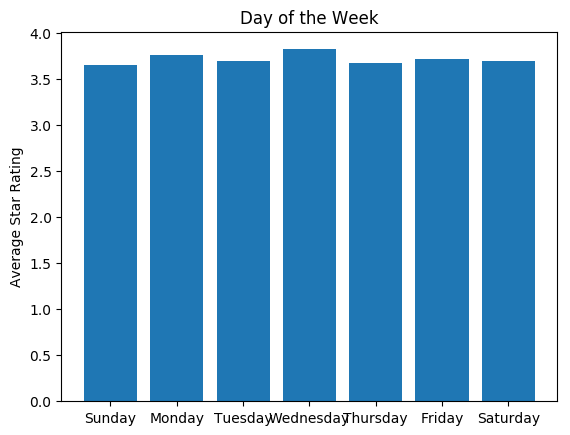

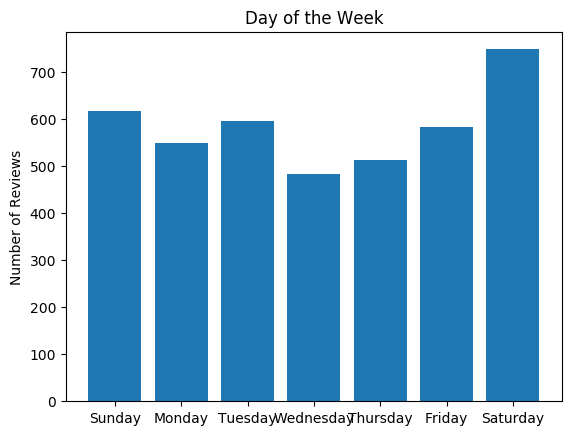

In [24]:
state_footfall('OH')

In [25]:
lat = list(rest_data["lat"])
long = list(rest_data["long"])

In [26]:
grouped_data = business.groupby("state")
size = list(grouped_data.size())
states = list(grouped_data.groups.keys())
lat = list(grouped_data['lat'].mean())
long = list(grouped_data['long'].mean())
loc = [(latitude,longitude) for latitude,longitude in zip(lat,long)]

<h4> Plotting a heatmap for number of restaurants in the given data </h4>

In [27]:
import plotly.plotly as py
import pandas as pd

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states,
        z = size,
        locationmode = 'USA-states',
        text = states,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Restaurant heat map")
        ) ]

layout = dict(
        title = 'Number of restaurants in various states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

<h4> Analyzing reviews using POS tagging to extract the relvant words for recommendation </h4>

In [28]:
def analyze_review(review, qualities):
    
    import nltk
    
    review_sentences = nltk.sent_tokenize(review)
    for sentence in review_sentences:
    
        temp_qualities = []
        count = 0
        quality = ""
        
        words = nltk.word_tokenize(sentence)
        words = [word.lower() for word in words]
        words = [word for word in words if word not in ('the','food','i','place','restaurant','meal','aquarium')]
        tags = nltk.pos_tag(words)
        
        for i in range(len(tags)):
            
            #current element stored
            tup = tags[i]
            prev_tup = tags[i-1]
            
            #increasing/decreasing the count according to the positive/negative value of adjective
            if(tup[1] == "JJ"):
            
                if(tup[0] in positive_words and prev_tup[0] != 'not'):
                    count += 1
                elif(tup[0] in negative_words and prev_tup[0] != 'not'):
                    count -= 1
                elif(tup[0] in positive_words and prev_tup[0] == 'not'):
                    count -= 1
                elif(tup[0] in negative_words and prev_tup[0] == 'not'):
                    count += 1
        
        for i in range(len(tags)):
            
            #current element stored
            tup = tags[i]
        
            #next element stored
            if(i < len(tags)-1):
                tup_next = tags[i+1]
            else:
                tup_next = ("Z","Z")
            
            #incrementing count for the noun associated with current count
            if(tup[1] == "NN"):
                
                quality = quality + tup[0]
                
                #checking if dish name is more than a word
                if(tup_next[1] != "NN"):
                    if(quality not in temp_qualities):
                        temp_qualities.append(quality)
                        quality = ""
                else:
                    quality = quality + " "
                    
        #Updating dictionary of qualities
        if (count != 0):
            for qual in temp_qualities:
                if(qual in qualities):
                    qualities[qual] += count
                else:
                    qualities[qual] = count

In [29]:
def for_rest_rev(reviews):
    
    qualities = dict({})
    
    for review in reviews:
        analyze_review(review,qualities)
    
    return(qualities)

In [30]:
rest_data=rest_data_reviews
rest_data.head()

,business_id,lat,long,business_name,address,city,state,categories,star_rating,attr,is_rest,cuisine,review_id,user_id,stars,date,text
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,2yYN8xbm2kGTQXKBH0A0Vg,m3yEBbCM1eswIn0pwRicCw,4.0,2015-07-14,Good place for breakfast :) The staff are very...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,IVIBJwvw6qnuNagKjkMIEQ,GNshwPuGg0GwAhvzQ3SSPA,2.0,2016-08-04,"Cute place, good location. Food is mediocre a..."
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,1q1AkRxhGFyzCEGGpfEt9g,adgH0h-BcCzivsIjV_sgwQ,3.0,2015-11-15,"Service was good, there was three of us, we ha..."
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,6mNnaSsUQmrFK965JsxGWw,4zMw7ETobF3nDsJqarNz0g,3.0,2015-04-24,Perfect little breakfast dinner. Good food but...
16,Bl7Y-ATTzXytQnCceg5k6w,41.726029,-81.240943,Sidewalk Cafe Painesville,1 S State St,Painesville,OH,"[American (Traditional), Breakfast & Brunch, R...",3.0,"{'GoodForMeal': {'dessert': False, 'latenight'...",1,Other,AhlgOhwD1Uq0Vj7flgEv_Q,XC54xapJFm7tNp1iwEUa_w,1.0,2014-06-29,I went there recently for breakfast and even t...


In [31]:
bus_id_set = set(rest_data["business_name"])
id_qualities = dict({})

for each_id in bus_id_set:
    reviews = rest_data.loc[rest_data["business_name"] == each_id ,"text"]
    q = for_rest_rev(reviews)
    id_qualities[each_id] = q

In [32]:
def search(food,city):
    from collections import Counter
    food_final = dict({})
    
    for key,value in id_qualities.items():
        city_1 = business.loc[business["business_name"] == key, "city"]
        if city == city_1.iloc[0]:
            if food in value.keys():
                food_final[key] = value[food]
    
    food_reviews = dict(Counter(food_final).most_common(5)).keys()
    return food_reviews

<h4> Using the analysis above, selecting top five restaurants for a given food item and location </h4>

In [33]:
top_five = list(search("beer","Las Vegas"))
top_five

['Yard House',
 'Slice of Vegas',
 'TAP Sports Bar',
 'Mint Indian Bistro',
 'Shucks Tavern & Oyster Bar']

<h4> The monthly average rating trend for these restaurants </h4>

In [34]:
#Plotting the rating trend
import plotly.plotly as py
import plotly.graph_objs as go


rest1=rest_data[rest_data['business_name']==top_five[0]] 
rest1['Year-Month']=rest1.apply(lambda x: x['date'][0:4]+' '+x['date'][5:7],axis=1)
rating_trend1=rest1.groupby(['Year-Month'])['stars'].mean()



dates_list = [datetime.datetime.strptime(date, '%Y %m').date() for date in rating_trend1.index]
trace1 = go.Scatter(
    x = dates_list,
    y = rating_trend1.values
)
data1 = [trace1]
py.iplot(data1, filename='basic-line')



/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divas781993/0 or inside your plot.ly account where it is named 'basic-line'


In [35]:
rest2=rest_data_reviews[rest_data['business_name']==top_five[1]] 
rest2['Year-Month']=rest2.apply(lambda x: x['date'][0:4]+' '+x['date'][5:7],axis=1)
rating_trend2=rest2.groupby(['Year-Month'])['stars'].mean()
dates_list = [datetime.datetime.strptime(date, '%Y %m').date() for date in rating_trend2.index]
trace2 = go.Scatter(
    x = dates_list,
    y = rating_trend2.values
)
data2 = [trace2]
py.iplot(data2, filename='basic-line')



/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divas781993/0 or inside your plot.ly account where it is named 'basic-line'


In [36]:
rest3=rest_data_reviews[rest_data['business_name']==top_five[2]] 
rest3['Year-Month']=rest3.apply(lambda x: x['date'][0:4]+' '+x['date'][5:7],axis=1)
rating_trend3=rest3.groupby(['Year-Month'])['stars'].mean()
dates_list = [datetime.datetime.strptime(date, '%Y %m').date() for date in rating_trend3.index]
trace3 = go.Scatter(
    x = dates_list,
    y = rating_trend3.values
)
data3 = [trace3]
py.iplot(data3, filename='basic-line')


/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divas781993/0 or inside your plot.ly account where it is named 'basic-line'


In [37]:
rest4=rest_data_reviews[rest_data['business_name']==top_five[3]] 
rest4['Year-Month']=rest4.apply(lambda x: x['date'][0:4]+' '+x['date'][5:7],axis=1)
rating_trend4=rest4.groupby(['Year-Month'])['stars'].mean()
dates_list = [datetime.datetime.strptime(date, '%Y %m').date() for date in rating_trend4.index]
trace4 = go.Scatter(
    x = dates_list,
    y = rating_trend4.values
)
data4 = [trace4]
py.iplot(data4, filename='basic-line')



/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divas781993/0 or inside your plot.ly account where it is named 'basic-line'


In [38]:
rest5=rest_data_reviews[rest_data['business_name']==top_five[4]] 
rest5['Year-Month']=rest5.apply(lambda x: x['date'][0:4]+' '+x['date'][5:7],axis=1)
rating_trend5=rest5.groupby(['Year-Month'])['stars'].mean()
dates_list = [datetime.datetime.strptime(date, '%Y %m').date() for date in rating_trend5.index]
trace5 = go.Scatter(
    x = dates_list,
    y = rating_trend5.values
)

data5 = [trace4]
py.iplot(data4, filename='basic-line')


/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divas781993/0 or inside your plot.ly account where it is named 'basic-line'


Yard House


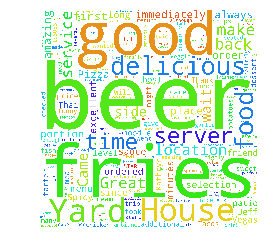

Slice of Vegas


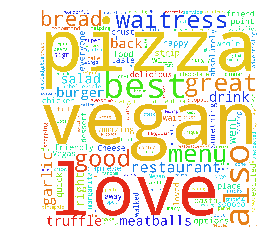

TAP Sports Bar


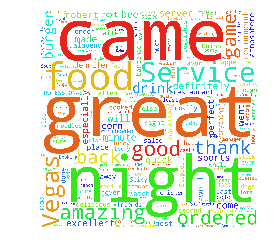

Mint Indian Bistro


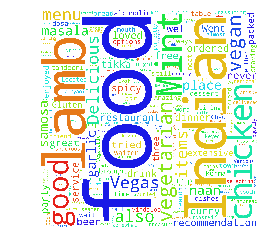

Shucks Tavern & Oyster Bar


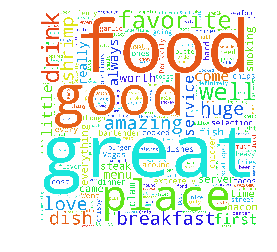

In [39]:
for name in top_five:
    
    # datetime.datetime.strptime(data.get('yelping_since').strip(),"%Y-%m").date()
    test_rest=rest_data[rest_data['business_name']==name] 
    test_rest=test_rest.sort_values('stars',ascending=False)

    #Getting top 5 reviews To understand the good things people have been saying lately about it
    no_of_reviews=10
    pos_text=[]
    for i in range(no_of_reviews):
        pos_text.append(test_rest.iloc[i]['text'])
    pos_text=' '.join(pos_text)
    
    from nltk.tokenize import word_tokenize
    pos_words=word_tokenize(pos_text)
    
    #Tring to remove punctuation and filter out the text
    pos_words_filtered=[]
    min_length=3
    DELETE_WORDS = []
    for words in pos_words:
        word = remove_punctuation(words)
        if (word and len(word)> min_length and (not(word in DELETE_WORDS)) ):
            pos_words_filtered.append(word)

    text=' '.join(pos_words_filtered)
    
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline

    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    print(name)
    plt.show()

In [40]:
def fav_food(state):
    
    state_foods = dict({})
    key_1 = business.loc[business["state"] == state, "business_name"]
    
    for key,value in id_qualities.items():
        if key in list(key_1):
                for key,value in value.items():
                    if key in state_foods.keys():
                        state_foods[key] += value
                    else:
                        state_foods[key] = value
    
    fav_food = dict(Counter(state_foods).most_common(10)).keys()
    return fav_food

In [41]:
states_fav_food = fav_food("NC")
states_fav_food

dict_keys(['service', 'staff', 'time', 'everything', 'menu', 'coffee', 'server', 'beer', 'price', 'location'])

<h4> Predicting positive or negative sentiment of a review </h4>

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def vader_comparison(texts):
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(texts)
    pos=compound=neu=neg=0
    num_sentences = len(sentences)
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/num_sentences
        compound+=vs['compound']/num_sentences
        neu+=vs['neu']/num_sentences
        neg+=vs['neg']/num_sentences
    result=(pos,compound,neu,neg)
    return result

In [43]:
def confusion_matrix(predicted, actual):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] == 1 : #labels that are 1.0  (positive examples)
            if predicted[i] == 1:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:              #labels that are 0.0 (negative examples)
            if predicted[i] == 0 :
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
    rtn = [tp, fp, tn, fn]

    return rtn



In [61]:
review_train=review[0:1000]
review_test=review[0:250]
print(sum(review_test['stars']<3)) # Negative reviews
print(sum(review_test['stars']>3)) # Positive reviews

38
165


In [44]:
# Predicting the sentiment using Vander 
def naive_sentiment(rating):
    if rating <3:
        return 0
    else :
        return 1

review_train=review[0:1000]
review_test=review[0:250]

review_train['sentiment']=review_train.apply(lambda x:  naive_sentiment(x['stars']) , axis=1)
review_test['sentiment']=review_test.apply(lambda x:  naive_sentiment(x['stars']) , axis=1)

review_train['sentiment']=review_train.apply(lambda x:  naive_sentiment(x['stars']) , axis=1)
review_test['sentiment']=review_test.apply(lambda x:  naive_sentiment(x['stars']) , axis=1)

review_train['positive_percentage_review']=review_train.apply(lambda x:  vader_comparison(x['text'])[0]*100 , axis=1)
review_test['positive_percentage_review']=review_test.apply(lambda x:  vader_comparison(x['text'])[0]*100 , axis=1)

lower_sentiment=min(review_train['positive_percentage_review'])
upper_sentiment=max(review_train['positive_percentage_review'])
step=(upper_sentiment-lower_sentiment)/100
sentiment_threshold=np.arange(lower_sentiment,upper_sentiment,step)

best_thresh=100
min_error=len(review_train)
n=len(review_train)
errors=[]
for i in range(len(sentiment_threshold)):
    x=review_train['positive_percentage_review']>sentiment_threshold[i]
    acc=sum(x==review_train['sentiment'])
    error=len(review_train)-acc
    errors.append((error/n)*100)
    if(error<min_error):
        min_error=error
        best_thresh=sentiment_threshold[i]
        
accuracy=(100-min(errors))
print("The accuracy of the model on the train data is ",accuracy,"%")

predicted=review_train['positive_percentage_review']>best_thresh
tp,fp,tn,fn=confusion_matrix(predicted,review_train['sentiment'])

print("True positive, False positive, True negative, False Negative are ",tp," ",fp," ",tn," ",fn)


x=review_test['positive_percentage_review']>best_thresh
accuracy=((sum(x==review_test['sentiment']))/(len(review_test)))*100
print("The accurcy of test data is ",accuracy,"%")


/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

The accuracy of the model on the train data is  87.5 %
True positive, False positive, True negative, False Negative are  818.0   102.0   57.0   23.0
The accurcy of test data is  86.8 %


/Users/divasverma/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<h4> Plot for the error of the predictive model for different threshold values </h4>

In [45]:
import plotly.plotly as py
import plotly.graph_objs as go
#Plot for the accuracy of the Algorithm for different values of the threshold 
trace = go.Scatter(
    x = sentiment_threshold,
    y = errors,
    name = 'Error %'
)

data = [trace]
py.iplot(data, filename='basic-line')




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divas781993/0 or inside your plot.ly account where it is named 'basic-line'


<h4> Predicting the ratings using SVM </h4>

SVM accuracy in predicting the rating of a review on test data is  41.4893617021 %


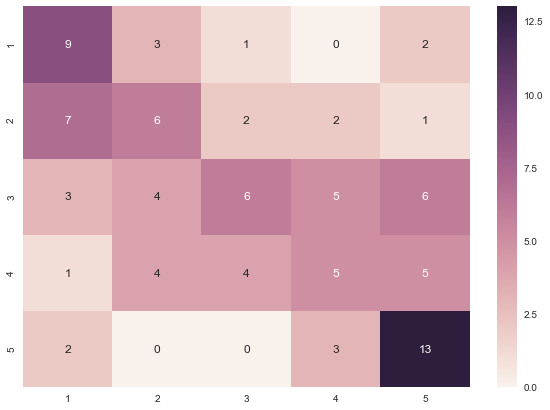

In [64]:
# Predicting rating using SVM
datafile='review.json'
stars=[]
text=[]
count=0
with open(datafile,'r') as f:
    for line in f:
        if(count>=1000):
            break
        count+=1
        data = json.loads(line)
        stars.append(data.get('stars'))
        text.append(data.get('text'))

from collections import Counter
def balance_classes(x_inp, y_inp):
    frequency = Counter(y_inp)
    maximum_possible = frequency.most_common()[-1][1]
    number_added = {clss: 0 for clss in frequency.keys()}
    yout=[]
    xout=[]
    for i, y in enumerate(y_inp):
        if number_added[y] < maximum_possible:
            yout.append(y)
            xout.append(x_inp[i])
            number_added[y]+= 1
    return xout, yout

balanced_x, balanced_y = balance_classes(text, stars)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(balanced_x)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(vectors, balanced_y, test_size=0.25, random_state=42)

from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train,Y_train)

prediction=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("SVM accuracy in predicting the rating of a review on test data is ",accuracy_score(Y_test,prediction)*100,"%")

from sklearn.metrics import confusion_matrix
#print("The confusion matrix on test data is \n",confusion_matrix(Y_test,prediction))

cm = confusion_matrix(Y_test,prediction)

df_cm = pd.DataFrame(cm, index = [i for i in ['1','2','3','4','5']],
                  columns = [i for i in ['1','2','3','4','5']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [65]:
#Predicting sentiment using SVM
sent=[]
for i in range(len(stars)):
    if(stars[i]<3):
        predict=0
        sent.append(predict)
    else:
        predict=1
        sent.append(predict)
        
balanced_x, balanced_y = balance_classes(text, sent)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(balanced_x)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(vectors, balanced_y, test_size=0.25, random_state=42)
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train,Y_train)
prediction=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("SVM accuracy in predicting the sentiment of a review on test data is ",accuracy_score(Y_test,prediction)*100,"%")

from sklearn.metrics import confusion_matrix
#print("The confusion matrix is \n",confusion_matrix(Y_test,prediction))

SVM accuracy in predicting the sentiment of a review on test data is  85.0 %


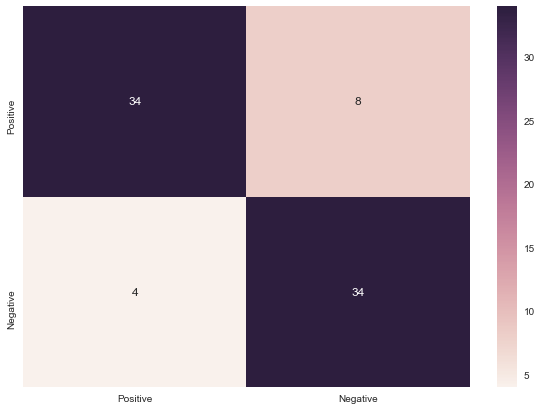

In [66]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test,prediction)

df_cm = pd.DataFrame(cm, index = [i for i in ['Positive','Negative']],
                  columns = [i for i in ['Positive','Negative']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)